<a href="https://colab.research.google.com/github/jcandane/StochasticPhysics/blob/main/RCF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Random Continuous Function Generation



## import useful libraries

In [ ]:
import numpy as np
from numpy import exp, sqrt
import scipy
import matplotlib.pyplot as plt

######### RCF class

class RCF():
    """
    this an object of a random-contionus function, with-respect-to a GP kernel
    f : IN -> OUT
    can we be given the points?
    a previous function to compose with?
    Automatic Derivatives??
    """

    def __init__(self, Domain, X, D=1, kernel=None):
        self.domain = Domain ### numpy.2darray
        self.D      = D      ### int (dimension of OUT)

        ### get IN points
        if isinstance(X, int): ## if X is int, then get random sampling to define function
            self.D_ix = self.getrandom(X)
        else: ## if X is 2d-np.array, then get uniform grid to define function
            try:
                self.D_ix = self.getgrid(X)
            except:
                raise print("Error")

        μ_i = np.zeros(self.D_ix.shape[0])

        ### cholesky-factor
        Σ_ij      = self.default_kernel(self.D_ix, self.D_ix)
        self.L_ij = np.linalg.cholesky(Σ_ij) ## if using random, it might not be PSD because of point collisions...

        ### calculate y-axis
        Σ_i  = np.diag(Σ_ij)
        D_iX = np.random.normal( μ_i[:,None]*np.ones(self.D)[None,:], Σ_i[:,None]*np.ones(self.D)[None,:], (Σ_i.shape[0],self.D) )
        ## correlate D_iX using the Cholesky-factorization, yielding random/correlated normal-samples
        self.D_iX = self.L_ij @ D_iX ## ~ Y N^2
        ### careful with the kernel correlation-length this can make things no so smooth!!

    def evalulate(self, D_ax):
        """ evalulate for arbitrary values/points in OUT given points in IN
        GIVEN   : function-values above {D_ix, D_iX, L_ij} : 2d-numpy.array
        GET     : D_aX
        """
        return self.default_kernel(D_ax, self.D_ix) @ scipy.linalg.cho_solve((self.L_ij, True), self.D_iX)

    def getgrid(self, dr_x): ###! spacing: linspace or arange???!!
        """
        get regular grid spacing based on dr_x
        Get: D_ix : numpy.2darray
        """
        R_ix = np.stack(np.meshgrid(*[ np.arange(self.domain[i,0], self.domain[i,1], dr_x[i]) for i in range(len(dr_x)) ]), axis=-1)
        return R_ix.reshape((np.prod( R_ix.shape[:-1] ), R_ix.shape[-1]))

    def getrandom(self, N):
        """ perhaps use Poisson-Disc sampling algorithm to ensure PSD!
        get random points in the domain to define the function
        Get: D_ix : numpy.2darray
        """
        return np.asarray([(element[1]-element[0])*np.random.rand(N) + element[0] for element in self.domain]).T

    def default_kernel(self, R_ix, R_jx, ξ=0.1):
        """
        compute kernel function (RBF) between two domain points

        R_ijx = X_ix - Y_jx
        Σ     = exp( - sum( R_ijx**2 , over=x) / ξ )

        INPUT  : X (X data) : numpy.2darray
                 Y (Y data) : numpy.2darray
                *ξ (correlation length) : float64
        RETURN : Σ : numpy.2darray
        """
        R_ij = np.linalg.norm(R_ix[:, None, :] - R_jx[None, :, :], axis=2)
        return np.exp( - R_ij**2 / ξ )

## 1d RCF

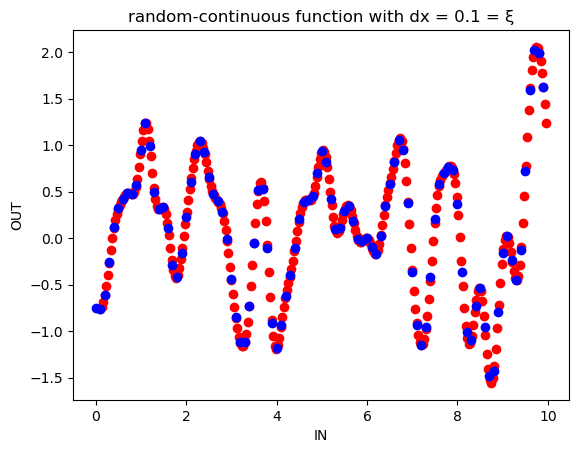

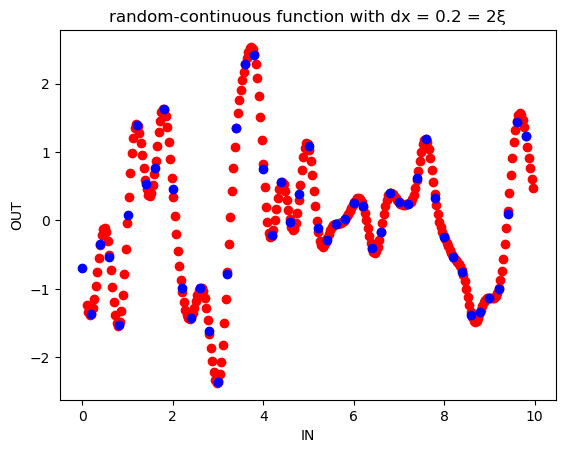

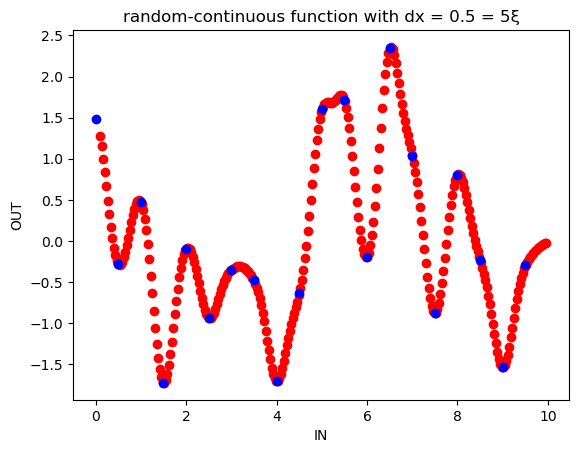

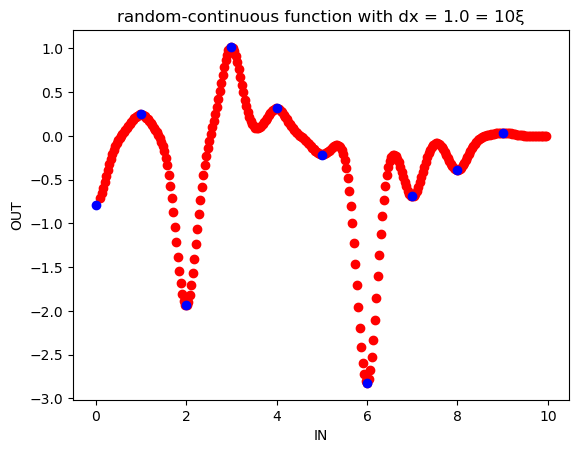

In [ ]:
dr_x   = np.array([0.1])
domain = np.array([[ 0.0, 10.0]])

f = RCF(domain, dr_x)
D_ax = np.array([np.arange(0.1, 10, 0.033)]).T

plt.scatter(D_ax[:,0], f.evalulate(D_ax)[:,0], c="r")
plt.scatter(f.D_ix[:,0], f.D_iX[:,0], c="b")
plt.title("random-continuous function with dx = 0.1 = ξ")
plt.xlabel("IN")
plt.ylabel("OUT")
plt.savefig("1dexample1.png")
plt.show()

dr_x   = np.array([0.2])
domain = np.array([[ 0.0, 10.0]])

f = RCF(domain, dr_x)
D_ax = np.array([np.arange(0.1, 10, 0.033)]).T

plt.scatter(D_ax[:,0], f.evalulate(D_ax)[:,0], c="r")
plt.scatter(f.D_ix[:,0], f.D_iX[:,0], c="b")
plt.title("random-continuous function with dx = 0.2 = 2ξ")
plt.xlabel("IN")
plt.ylabel("OUT")
plt.savefig("1dexample2.png")
plt.show()

dr_x   = np.array([0.5])
domain = np.array([[ 0.0, 10.0]])

f = RCF(domain, dr_x)
D_ax = np.array([np.arange(0.1, 10, 0.033)]).T

plt.scatter(D_ax[:,0], f.evalulate(D_ax)[:,0], c="r")
plt.scatter(f.D_ix[:,0], f.D_iX[:,0], c="b")

plt.title("random-continuous function with dx = 0.5 = 5ξ")
plt.xlabel("IN")
plt.ylabel("OUT")
plt.savefig("1dexample3.png")
plt.show()

dr_x   = np.array([1.0])
domain = np.array([[ 0.0, 10.0]])

f = RCF(domain, dr_x)
D_ax = np.array([np.arange(0.1, 10, 0.033)]).T

plt.scatter(D_ax[:,0], f.evalulate(D_ax)[:,0], c="r")
plt.scatter(f.D_ix[:,0], f.D_iX[:,0], c="b")
plt.title("random-continuous function with dx = 1.0 = 10ξ")
plt.xlabel("IN")
plt.ylabel("OUT")
plt.savefig("1dexample4.png")
plt.show()


## 2D RCF

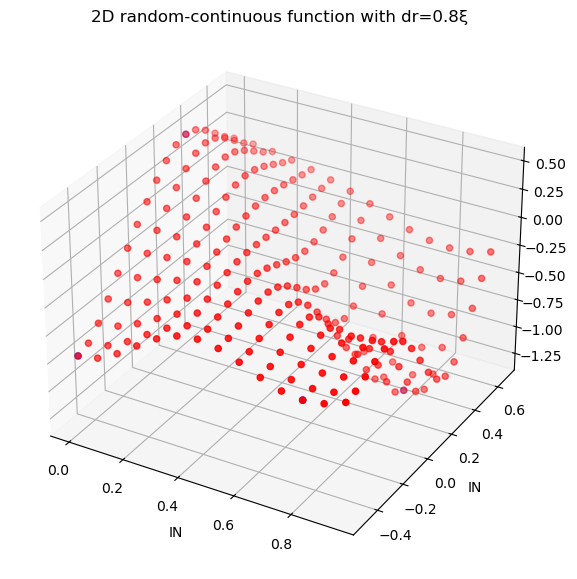

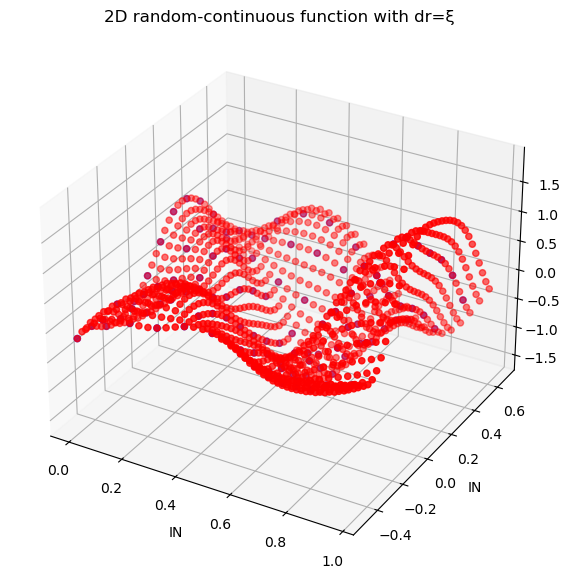

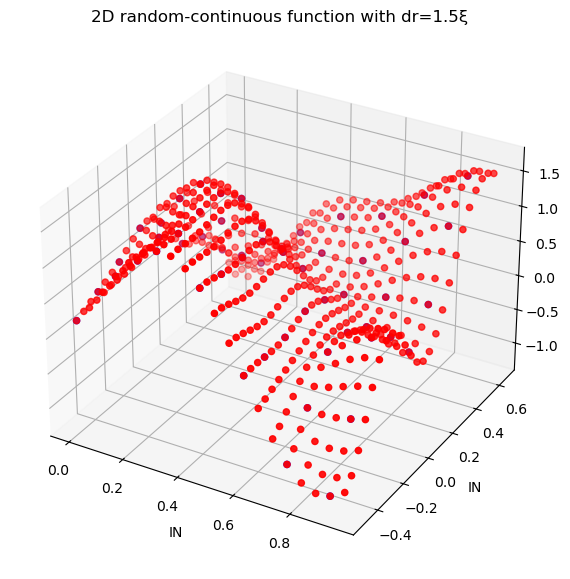

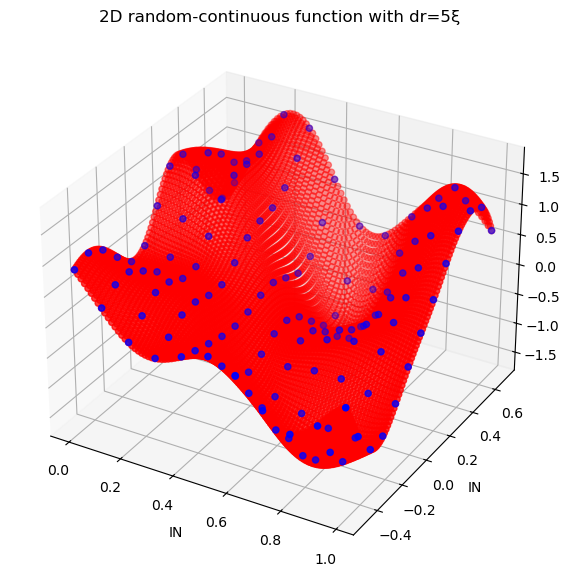

In [ ]:
dr_x   = np.array([0.8, 0.8])
domain = np.array([[ 0.0, 1.0],
                   [-0.5,  0.7]])
f = RCF(domain, dr_x)

R_ax = np.stack(np.meshgrid(*[ np.arange(domain[i,0], domain[i,1], dr_x[i]/11) for i in range(len(dr_x)) ]), axis=-1)
R_ax = R_ax.reshape((np.prod( R_ax.shape[:-1] ), R_ax.shape[-1]))

# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D(R_ax[:,0], R_ax[:,1], f.evalulate(R_ax)[:,0], color = "red")
ax.scatter3D(f.D_ix[:,0], f.D_ix[:,1], f.D_iX[:,0], color = "blue")
plt.title("2D random-continuous function with dr=0.8ξ")
plt.xlabel("IN")
plt.ylabel("IN")
plt.savefig("2dexample0.png")
plt.show()


#######
######

dr_x   = np.array([0.1, 0.1])
domain = np.array([[ 0.0, 1.0],
                   [-0.5,  0.7]])
f = RCF(domain, dr_x)

R_ax = np.stack(np.meshgrid(*[ np.arange(domain[i,0], domain[i,1], dr_x[i]/3) for i in range(len(dr_x)) ]), axis=-1)
R_ax = R_ax.reshape((np.prod( R_ax.shape[:-1] ), R_ax.shape[-1]))

# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D(R_ax[:,0], R_ax[:,1], f.evalulate(R_ax)[:,0], color = "red")
ax.scatter3D(f.D_ix[:,0], f.D_ix[:,1], f.D_iX[:,0], color = "blue")
plt.title("2D random-continuous function with dr=ξ")
plt.xlabel("IN")
plt.ylabel("IN")
plt.savefig("2dexample1.png")
plt.show()


#############
#############
dr_x   = np.array([0.15, 0.15])
domain = np.array([[ 0.0, 1.0],
                   [-0.5,  0.7]])
f = RCF(domain, dr_x)

R_ax = np.stack(np.meshgrid(*[ np.arange(domain[i,0], domain[i,1], dr_x[i]/3) for i in range(len(dr_x)) ]), axis=-1)
R_ax = R_ax.reshape((np.prod( R_ax.shape[:-1] ), R_ax.shape[-1]))

# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D(R_ax[:,0], R_ax[:,1], f.evalulate(R_ax)[:,0], color = "red")
ax.scatter3D(f.D_ix[:,0], f.D_ix[:,1], f.D_iX[:,0], color = "blue")
plt.title("2D random-continuous function with dr=1.5ξ")
plt.xlabel("IN")
plt.ylabel("IN")
plt.savefig("2dexample2.png")
plt.show()

#############
#############
dr_x   = np.array([0.099, 0.099])
domain = np.array([[ 0.0, 1.0],
                   [-0.5,  0.7]])
f = RCF(domain, dr_x)

R_ax = np.stack(np.meshgrid(*[ np.arange(domain[i,0], domain[i,1], dr_x[i]/8) for i in range(len(dr_x)) ]), axis=-1)
R_ax = R_ax.reshape((np.prod( R_ax.shape[:-1] ), R_ax.shape[-1]))

# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D(R_ax[:,0], R_ax[:,1], f.evalulate(R_ax)[:,0], color = "red")
ax.scatter3D(f.D_ix[:,0], f.D_ix[:,1], f.D_iX[:,0], color = "blue")
plt.title("2D random-continuous function with dr=5ξ")
plt.xlabel("IN")
plt.ylabel("IN")
plt.savefig("2dexample3.png")
plt.show()